# General REDCOMETS test
- It can't handle multivariate time series (the ones that got mutliple channels)

In [1]:
import sys, os
sys.path.append(os.path.abspath('..'))

from helpers import *
from Redcomets import REDCOMETS
from aeon.datasets import load_unit_test
from aeon.datasets import load_gunpoint
from aeon.datasets import load_basic_motions

## Unit Test 

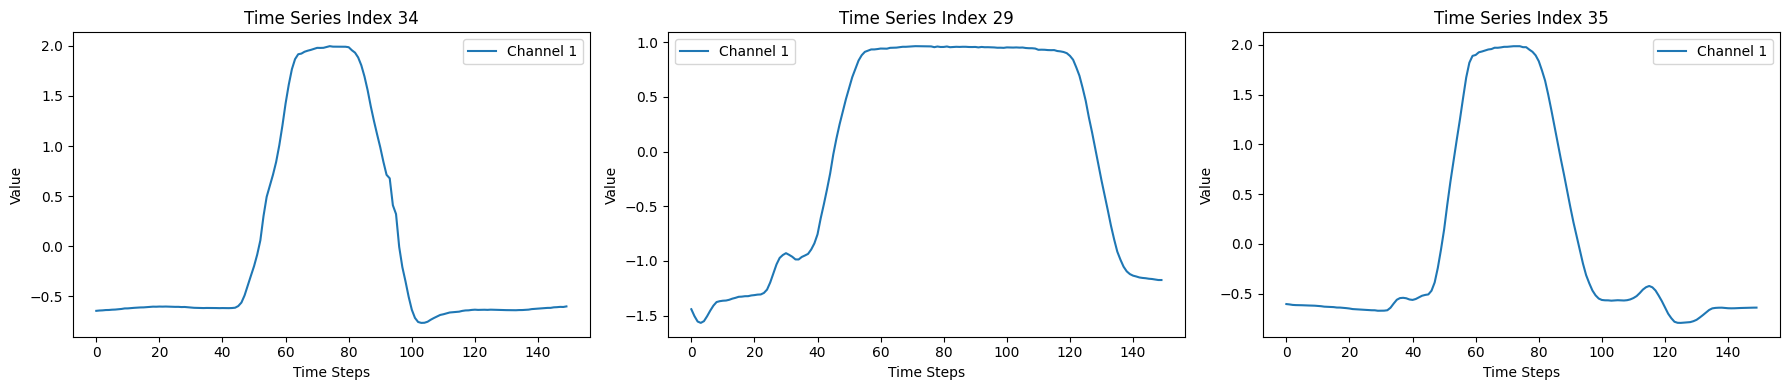

In [2]:
# Load Data
Xtrain, ytrain = load_gunpoint(split="TRAIN")
#Xtrain, ytrain = load_basic_motions(split="TRAIN")
#Xtrain, ytrain = load_unit_test(split="train")


Xtest, ytest = load_gunpoint(split="TEST")
#Xtest, ytest = load_basic_motions(split="TEST")
#Xtest, ytest = load_unit_test(split="test")

#Plot them
plot_random_time_series(Xtrain, n = 3)

In [3]:
clf = REDCOMETS(variant = 3)  
clf.fit(Xtrain, ytrain)  

y_pred = clf.predict(Xtest)  

In [4]:
clf.sax_clfs

[(RandomForestClassifier(n_jobs=1, oob_score=True),
  np.float64(0.8472727272727273)),
 (RandomForestClassifier(n_jobs=1, oob_score=True),
  np.float64(0.9236363636363636)),
 (RandomForestClassifier(n_jobs=1, oob_score=True),
  np.float64(0.9618181818181819)),
 (RandomForestClassifier(n_jobs=1, oob_score=True),
  np.float64(0.8654545454545455)),
 (RandomForestClassifier(n_jobs=1, oob_score=True),
  np.float64(0.8109090909090909)),
 (RandomForestClassifier(n_jobs=1, oob_score=True),
  np.float64(0.8454545454545455)),
 (RandomForestClassifier(n_jobs=1, oob_score=True),
  np.float64(0.8854545454545455))]

In [5]:
clf.get_ensemble_proximities(Xtrain, group = "all")

array([[0.        , 0.04767946, 0.02952818, ..., 0.0381167 , 0.00895164,
        0.00685967],
       [0.05583273, 0.        , 0.01888651, ..., 0.07478746, 0.02118014,
        0.01255402],
       [0.03416537, 0.01933222, 0.        , ..., 0.03688549, 0.02402391,
        0.00983358],
       ...,
       [0.0362652 , 0.07596276, 0.05616105, ..., 0.        , 0.01995832,
        0.00789216],
       [0.01123273, 0.01998826, 0.04095167, ..., 0.01455709, 0.        ,
        0.00809421],
       [0.0116278 , 0.01165931, 0.00688263, ..., 0.00772546, 0.00906632,
        0.        ]])

## Static Variable Testing

In [6]:
#Generate random static variables to test algorithm
Xstatic = np.random.rand(Xtrain.shape[0], 45)
Xstatic_test = np.random.rand(Xtest.shape[0], 45)

#To test if None works
# Xstatic = None
# Xstatic_test = None

In [7]:
Xtrain.shape

(50, 1, 150)

In [14]:
Xstatic.shape, Xtrain.shape, type(Xstatic)

((50, 45), (50, 1, 150), numpy.ndarray)

In [9]:
rc = REDCOMETS(variant = 3, static = Xstatic)  
rc.fit(Xtrain, ytrain)  

REDCOMETS(static=array([[4.95447411e-01, 9.56988413e-01, 1.77398818e-01, ...,
        2.46848866e-01, 9.02693238e-01, 4.18939338e-01],
       [8.78130829e-01, 3.25490441e-01, 2.26867890e-02, ...,
        7.93618275e-01, 1.47703557e-02, 8.40792376e-01],
       [3.55881631e-01, 5.95990220e-01, 5.17042765e-01, ...,
        4.88709001e-01, 9.63012305e-01, 2.11749785e-02],
       ...,
       [6.10482115e-01, 1.22480485e-01, 3.63756499e-01, ...,
        4.59557049e-04, 7.42062288e-01, 9.29398202e-01],
       [1.82256844e-01, 4.62007867e-01, 9.30683182e-01, ...,
        6.00027946e-01, 6.26046895e-01, 2.91082241e-01],
       [2.72262895e-01, 9.51888670e-01, 1.60623457e-01, ...,
        2.82988563e-01, 2.70200535e-01, 9.66858656e-01]]))

In [10]:
static_prox = rc.get_ensemble_proximities(Xtrain, group = "all")
static_prox

array([[0.        , 0.03129662, 0.0224719 , ..., 0.02782288, 0.01381642,
        0.0141106 ],
       [0.0302404 , 0.        , 0.01457119, ..., 0.04064051, 0.0162773 ,
        0.01589949],
       [0.01976662, 0.02313063, 0.        , ..., 0.02874878, 0.03436286,
        0.009242  ],
       ...,
       [0.03128399, 0.03906265, 0.04274934, ..., 0.        , 0.02256299,
        0.00769557],
       [0.01568239, 0.02007811, 0.0333293 , ..., 0.01954538, 0.        ,
        0.01269196],
       [0.01361224, 0.02063656, 0.01408726, ..., 0.01234059, 0.01121946,
        0.        ]])

In [11]:
rc = REDCOMETS(variant = 3, static = None)  
rc.fit(Xtrain, ytrain)  

no_static_prox = rc.get_ensemble_proximities(Xtrain, group = "all")

#Compare the two proximities
print(f"Shape of Xtrain: ", Xtrain.shape)
print("Shape of static_prox: ", static_prox.shape)
print("Shape of no_static_prox: ", no_static_prox.shape)
static_prox == no_static_prox

Shape of Xtrain:  (50, 1, 150)
Shape of static_prox:  (50, 50)
Shape of no_static_prox:  (50, 50)


array([[ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False,  True]])

# Testing Shape Concerns
Why does it add extra rows

In [12]:
# Testing
rc = REDCOMETS(variant = 3, static = None, debug_mode=True)  
rc.fit(Xtrain, ytrain)  

min_neighbours: 24
max_neighbours: 26


X_smote shape: (52, 150)
y_smote shape: (52,)


X_sfa shape: (52, 113)
X_sfa shape: (52, 115)
X_sfa shape: (52, 22)
X_sfa shape: (52, 20)
X_sfa shape: (52, 92)
X_sfa shape: (52, 105)
X_sfa shape: (52, 27)


REDCOMETS(debug_mode=True)

In [13]:
rc.get_ensemble_oob_score()

np.float64(0.8470792839460897)